# lineq_dc_circuit
+ [System of linear equations for DC circuit](https://neuron.eng.wayne.edu/auth/ece3040/lectures/lecture15.pdf)
+ [Applications of system of linear equations to electrical networks](https://home.csulb.edu/~jchang9/m247/m247_poster_R_Odisho_sp09.pdf)
+ [Solving systems of linear equations with Python's Numpy](https://stackabuse.com/solving-systems-of-linear-equations-with-pythons-numpy/)

## questions

### part a (in-class)
1. Write 1st and 2nd Kirchhof laws
2. Write linear equations for $I_1$, $I_2$, $I_3$, and $I_4$ for following figure. <br>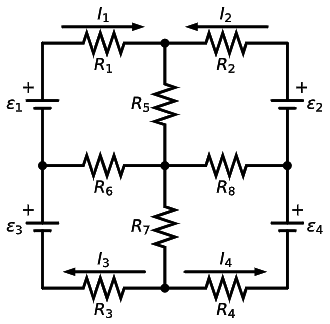
3. Write matrix form of previous linear equations.
4. Write augmented matrix for previous matrix.
5. Write final matrix that represent values for $I_1$, $I_2$, $I_3$, and $I_4$, symbolically.

### part b (take-home)
1. Report image produced by executing following lines of code.
```python
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='schematic.svg') as d:
    d += (R2 := elm.Resistor().label('$R_2$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_2$', loc='bottom').label("+", ofst=(-0.4, 0.9))
    d += elm.Resistor().left().label('$R_8$', loc='bottom')
    d += elm.Resistor().up().label('$R_5$')
    d += elm.Dot()
    d += (R1 := elm.Resistor().left().label('$R_1$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_1$', loc='top').label("+", ofst=(-0.4, 0.2))
    d += elm.Dot()
    d.push()
    d += elm.Resistor().right().label('$R_6$', loc='bottom')
    d.pop()
    d += elm.BatteryCell().down().reverse().label('$\epsilon_3$', loc='top').label("+", ofst=(0.4, 0.2))
    d += (R3 := elm.Resistor().right().label('$R_3$', loc='bottom'))
    d += elm.Dot()
    d.push()
    d += (R4 := elm.Resistor().right().label('$R_4$', loc='bottom'))
    d += elm.BatteryCell().up().label('$\epsilon_4$', loc='bottom').label("+", ofst=(-0.4, -0.8))
    d += elm.Dot()
    d.pop()
    d += elm.Resistor().up().label('$R_7$', loc='top')
    d += elm.Dot().color('black')
    d += elm.CurrentLabel().at(R1).label('$I_1$')
    d += elm.CurrentLabel().reverse().at(R2).label('$I_2$')
    d += elm.CurrentLabel().at(R3).label('$I_3$')
    d += elm.CurrentLabel().reverse().at(R4).label('$I_4$')
```
2. Write linear equations for $I_1$, $I_2$, $I_3$, and $I_4$ from produced figure.
3. Write matrix form of previous linear equations.
4. Write augmented matrix for previous matrix and code representing the augmented matrix.
5. Find solutions for $I_1$, $I_2$, $I_3$, and $I_4$ using [`numpy.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) for following values, where $R_i$ is in $\rm \Omega$ and $\varepsilon_i$ is in $\rm V$.

$R_1$ | $R_2$ | $R_3$ | $R_4$ | $R_5$ | $R_6$ | $R_7$ | $R_8$ | $\varepsilon_1$ | $\varepsilon_2$ | $\varepsilon_3$ | $\varepsilon_4$
:-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:
1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 12 | 15 | 16 | 19 

## answers

+ Put your answers of part b below this cell.
+ Write only one answer in one Code cell or in one Markdown cell.
+ There should be **at least five cells (Code cells + Markdown cells)**.
+ Existence of additional Markdown cells for explanation are optional.

### Solusi nomor 1

Catatan: gambar di part b berbeda dengan di part a (di bagian $\varepsilon_3$ dan $\varepsilon_4$). Untuk soal 2, 3, 4, dan 5 pada part b, akan digunakan rangkaian yang sesuai dengan gambar pada part b.

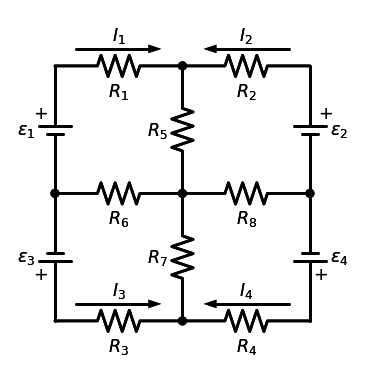

In [1]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='schematic.svg') as d:
    d += (R2 := elm.Resistor().label('$R_2$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_2$', loc='bottom').label("+", ofst=(-0.4, 0.9))
    d += elm.Resistor().left().label('$R_8$', loc='bottom')
    d += elm.Resistor().up().label('$R_5$')
    d += elm.Dot()
    d += (R1 := elm.Resistor().left().label('$R_1$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_1$', loc='top').label("+", ofst=(-0.4, 0.2))
    d += elm.Dot()
    d.push()
    d += elm.Resistor().right().label('$R_6$', loc='bottom')
    d.pop()
    d += elm.BatteryCell().down().reverse().label('$\epsilon_3$', loc='top').label("+", ofst=(0.4, 0.2))
    d += (R3 := elm.Resistor().right().label('$R_3$', loc='bottom'))
    d += elm.Dot()
    d.push()
    d += (R4 := elm.Resistor().right().label('$R_4$', loc='bottom'))
    d += elm.BatteryCell().up().label('$\epsilon_4$', loc='bottom').label("+", ofst=(-0.4, -0.8))
    d += elm.Dot()
    d.pop()
    d += elm.Resistor().up().label('$R_7$', loc='top')
    d += elm.Dot().color('black')
    d += elm.CurrentLabel().at(R1).label('$I_1$')
    d += elm.CurrentLabel().reverse().at(R2).label('$I_2$')
    d += elm.CurrentLabel().at(R3).label('$I_3$')
    d += elm.CurrentLabel().reverse().at(R4).label('$I_4$')

### Solusi nomor 2
$$
    \varepsilon_1-I_1R_1-(I_1+I_2)R_5-(I_1+I_3)R_6=0\\
    \varepsilon_2-I_2R_2-(I_1+I_2)R_5-(I_2+I_4)R_8=0\\
    \varepsilon_3-I_3R_3-(I_3+I_4)R_7-(I_1+I_3)R_6=0\\
    \varepsilon_4-I_4R_4-(I_3+I_4)R_7-(I_2+I_4)R_8=0
$$

atau

$$
    I_1(R_1+R_5+R_6) + I_2R_5 + I_3R_6=\varepsilon_1\\
    I_1R_5+I_2(R_2+R_5+R_8) + I_4R_8=\varepsilon_2\\
    I_1R_6+I_3(R_3+R_6+R_7)+I_4R_7=\varepsilon_3\\
    I_2R_8+I_3R_7+I_4(R_4+R_7+R_8)=\varepsilon_4
$$

### Solusi nomor 3

$$
\begin{bmatrix}
    R_1+R_5+R_6 & R_5 & R_6 & 0\\
    R_5 & R_2+R_5+R_8 & 0 & R_8\\
    R_6 & 0 & R_3+R_6+R_7 & R_7\\
    0 & R_8 & R_7 & R_4+R_7+R_8 \end{bmatrix}
= \begin{bmatrix}
    \varepsilon_1 \\
    \varepsilon_2 \\
    \varepsilon_3 \\
    \varepsilon_4 \end{bmatrix}
$$

### Solusi nomor 4
Augmented matrix: 
$$
A = \begin{bmatrix}
    R_1+R_5+R_6 & R_5 & R_6 & 0 & \varepsilon_1\\
    R_5 & R_2+R_5+R_8 & 0 & R_8 & \varepsilon_2\\
    R_6 & 0 & R_3+R_6+R_7 & R_7 & \varepsilon_3\\
    0 & R_8 & R_7 & R_4+R_7+R_8 & \varepsilon_4\end{bmatrix}
$$

Berikut adalah python code untuk representasi augmented matrix
```python
A = np.array([[R1+R5+R6, R5, R6, 0, epsilon_1],
              [R5, R2+R5+R8, 0, R8, epsilon_2],
              [R6, 0, R3+R6+R7, R7, epsilon_3],
              [0, R8, R7, R4+R7+R8, epsilon_4]])
```

In [2]:
#Solusi nomor 5

import numpy as np

R1, R2, R3, R4, R5, R6, R7, R8 = range(1,9)
epsilon_1, epsilon_2, epsilon_3, epsilon_4 = 12, 15, 16, 19

M = np.array([[R1+R5+R6, R5, R6, 0],
              [R5, R2+R5+R8, 0, R8],
              [R6, 0, R3+R6+R7, R7],
              [0, R8, R7, R4+R7+R8]])
b = np.array([[epsilon_1],[epsilon_2],[epsilon_3],[epsilon_4]])

I = np.linalg.solve(M, b)
for i in range(4):
    print(f"I{i+1} = {I[i][0]} A")


I1 = 0.49500659506312417 A
I2 = 0.5325042396834369 A
I3 = 0.5662332768042208 A
I4 = 0.5671754286791032 A
